In [1]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [2]:
runNum = 15921
dbstring = ("http://dbdata0vm.fnal.gov:9091/QE/gm2/dev/app/SQ/query?dbname=postgres_dev&t=nearline_sync_energy_constants"+
            "&w=validfromrun:"+str(runNum)+"&w=calonum:1&w=isvalid:t&o=-validfromrun&l=1&w="+
            "derivedsubrun:lt:343&o=-derivedsubrun")

In [3]:
print(dbstring)

http://dbdata0vm.fnal.gov:9091/QE/gm2/dev/app/SQ/query?dbname=postgres_dev&t=nearline_sync_energy_constants&w=validfromrun:15921&w=calonum:1&w=isvalid:t&o=-validfromrun&l=1&w=derivedsubrun:lt:343&o=-derivedsubrun


In [4]:
import urllib

opener = urllib.request.urlopen(dbstring)
#f = opener.open(dbstring)
content = opener.read()

In [5]:
print(content)
print(type(content))

string = content.decode("utf-8") 

b'validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun\n15921,driftCorrection,1,"[1.01686, 1.01478, 1.01497, 1.01006, 1.01584, 1.01379, 1.01613, 1.01774, 1.01471, 1.00886, 1.01858, 1.01779, 1.01462, 1.01363, 1.0225, 1.01658, 1.02076, 1.01984, 1.01582, 1.01917, 1.03311, 1.02022, 1.02808, 1.02268, 1.02761, 1.03054, 1.035, 1.0166, 1.01098, 1.01406, 1.01589, 1.01968, 1.01929, 1.03462, 1.02673, 1.02958, 1.0098, 1.01424, 1.01843, 1.01752, 1.01916, 1.01992, 1.01622, 1.02498, 1.02368, 1.01474, 1.01345, 1.01644, 1.01693, 1.01359, 1.01833, 1.02, 1.01712, 1.01761]",2018-05-04 15:16:03.582164,True,14395,300\n'
<class 'bytes'>


In [6]:

n = 106

print(string.index('['))
print(string[n:n+6])

105
1.0168


In [7]:
runlist = [15921]
#runlist = [15921,  15924,  15927,  15930,  15933,  15936,  15939,  15942,  15945,  15948,  15951,  
#           15954,  15957,  15960,  15963,  15968,  15972,  15975,  15980,  15984,  15987,  15991,  
#           15922,  15925,  15928,  15931,  15934,  15937,  15940,  15943,  15946,  15949,  15952,  
#           15955,  15958,  15961,  '''15964,'''  15969,  15973,  15977,  15981,  15985,  15988,  15923,  
#           15926,  15929,  15932,  15935,  15938,  15941,  15944,  15947,  15950,  15953,  15956,  
#           15959,  15962,  15967,  15970,  15974,  15978,  15982,  15986,  15989]

15964 not found validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun



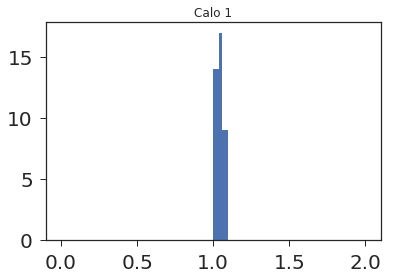

15964 not found validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun



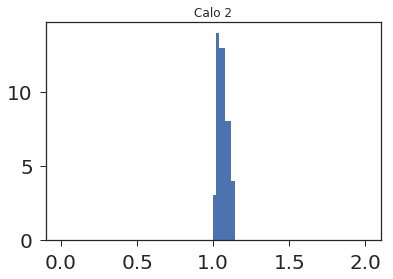

15964 not found validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun



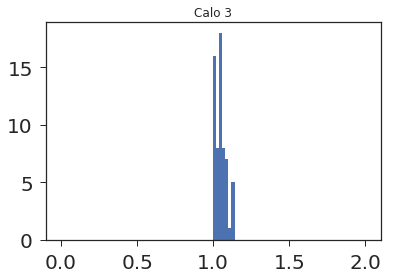

15964 not found validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun



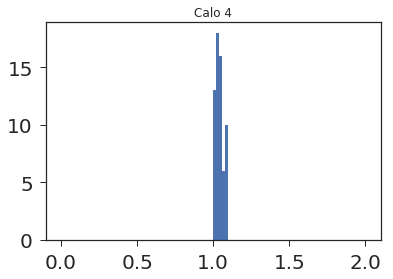

15964 not found validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun



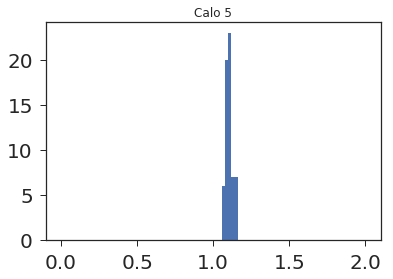

15964 not found validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun

15970 not found validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun
15970,driftCorrection,6,"[1.05, 1.05347, 1.06504, 1.06958, 1.05949, 1.0655, 1.09357, 1.08727, 1.07294, 1.05512, 1.05459, 1.05214, 1.06014, 1.06906, 1.06882, 1.06929, 1.09853, 1.08604, 1.05354, 1.0536, 1.0851, 1.05873, 1.07951, 1.0762, 1.07984, 1.12758, 1.08968, 1.04887, 1.05939, 1.05426, 1.08153, 1.09456, 1.07114, 1.11622, 1.12655, 1.09255, 1.05059, 1.04895, 1.0526, 1.05391, 1.05926, 1.08785, 1.11543, 1.09873, 1.08831, 1.06417, 1.0546, 1.05612, 1.06339, 1.08075, 1.06084, 1.08446, 1.09445, 1.08763]",2018-05-04 21:38:03.075947,True,14395,50



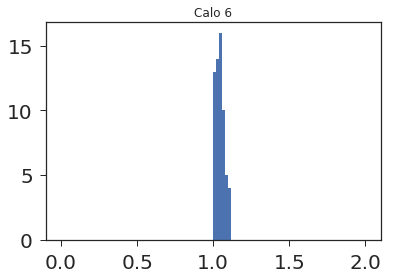

15964 not found validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun



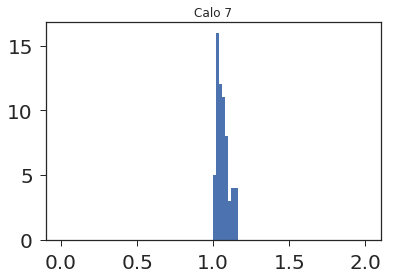

15964 not found validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun



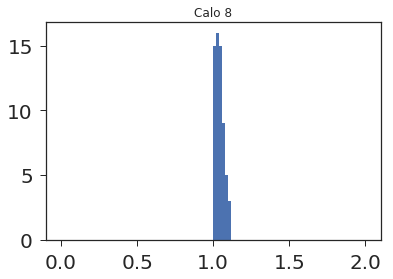

15964 not found validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun



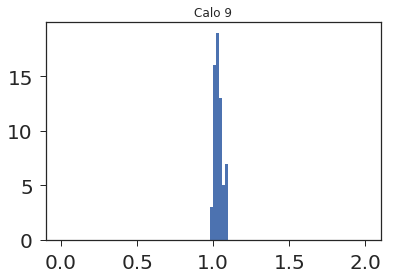

15964 not found validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun



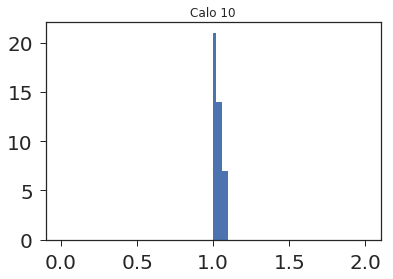

15964 not found validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun



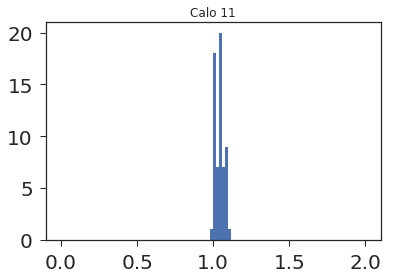

15964 not found validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun



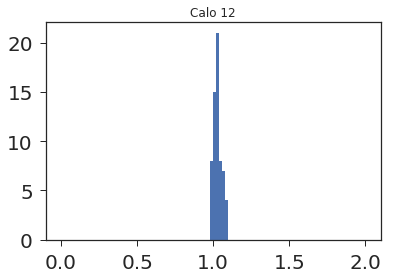

15964 not found validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun



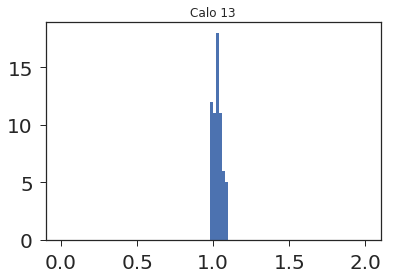

15964 not found validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun



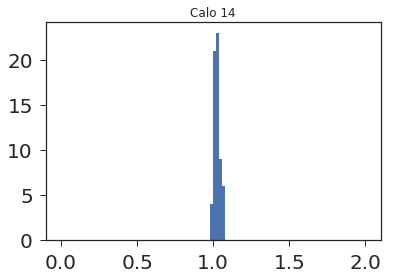

15964 not found validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun



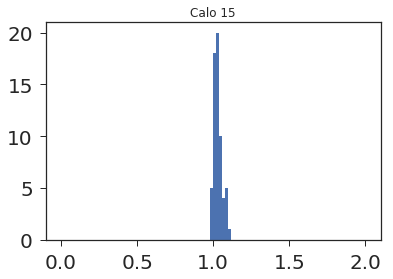

15964 not found validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun



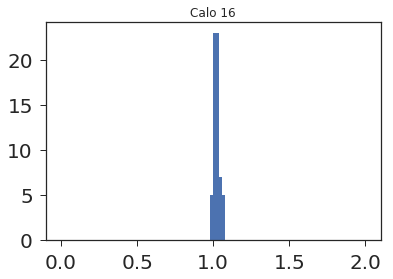

15964 not found validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun



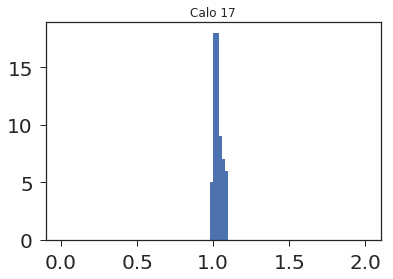

15964 not found validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun



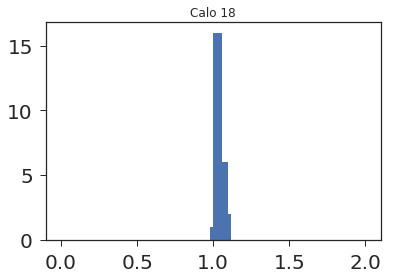

15964 not found validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun



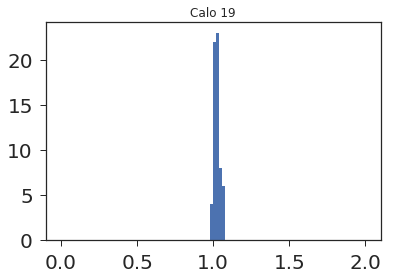

15964 not found validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun



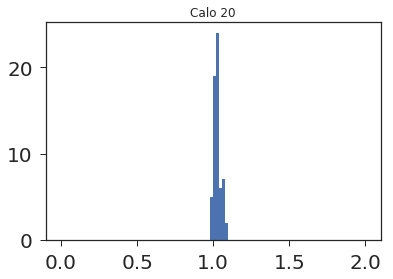

15964 not found validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun



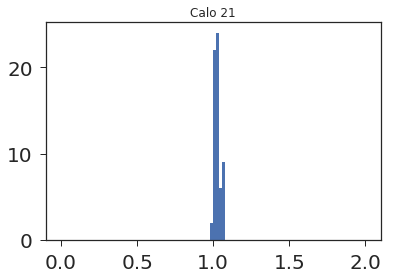

15964 not found validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun



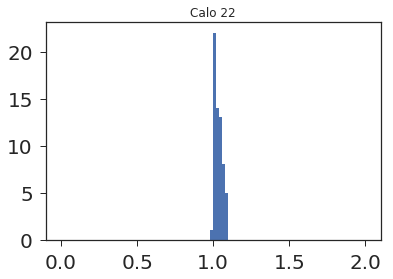

15964 not found validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun



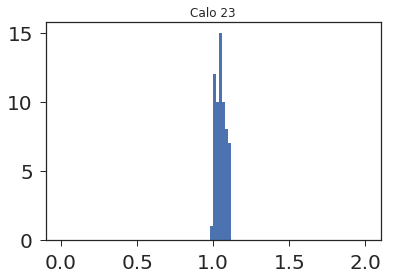

15964 not found validfromrun,type,calonum,constants,generatedtime,isvalid,baserun,derivedsubrun



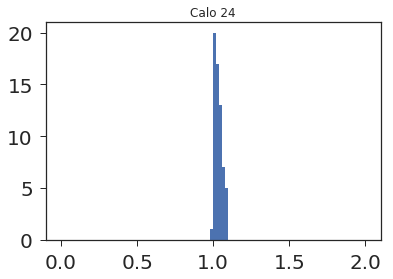

In [13]:
for caloNum in range(1,25):
    print("Starting Calo", caloNum)
    xtalCalib = []
    for runNum in runlist:
        dbstring = ("http://dbdata0vm.fnal.gov:9091/QE/gm2/dev/app/SQ/query?dbname=postgres_dev&t=nearline_sync_energy_constants"+
                "&w=validfromrun:"+str(runNum)+"&w=calonum:"+str(caloNum)+"&w=isvalid:t&o=-validfromrun&l=1&w="+
                "derivedsubrun:lt:343&o=-derivedsubrun")

        opener = urllib.request.urlopen(dbstring)
        content = opener.read()
        content = content.decode("utf-8")

        try:
            n = content.index('[') + 1
            xtalCalib.append(float(content[n:n+5]))
        except:
            print(runNum, "not found", content)
            
    plt.hist(xtalCalib, range = (0,2), bins=100)
    plt.title("Calo "+str(caloNum))
    plt.show()

In [66]:
kimConstants = []

for caloNum in range(1,25):
    print("Starting Calo", caloNum)
    xtalCalib = []
    for runNum in runlist:
        dbstring = ("http://dbdata0vm.fnal.gov:9091/QE/gm2/dev/app/SQ/query?dbname=postgres_dev&t=nearline_sync_energy_constants"+
                "&w=validfromrun:"+str(runNum)+"&w=calonum:"+str(caloNum)+"&w=isvalid:t&o=-validfromrun&l=1&w="+
                "derivedsubrun:lt:343&o=-derivedsubrun")

        opener = urllib.request.urlopen(dbstring)
        content = opener.read()
        content = content.decode("utf-8")
#        print("Content:", content)
#        print("")

        try:
            n = content.index('[') + 1
            n2 = content.index(']') - 1
            kimConstants.append(content[n:n2])
        except:
            print(runNum, "not found", content)

#print(kimConstants)

Starting Calo 1
Starting Calo 2
Starting Calo 3
Starting Calo 4
Starting Calo 5
Starting Calo 6
Starting Calo 7
Starting Calo 8
Starting Calo 9
Starting Calo 10
Starting Calo 11
Starting Calo 12
Starting Calo 13
Starting Calo 14
Starting Calo 15
Starting Calo 16
Starting Calo 17
Starting Calo 18
Starting Calo 19
Starting Calo 20
Starting Calo 21
Starting Calo 22
Starting Calo 23
Starting Calo 24


In [27]:
kimConstants2 = []
for entry in kimConstants:
    ding = entry.split()
    ding = [float(x[:-1]) for x in ding]
    print(ding)
    for dong in ding:
        kimConstants2.append(dong)

[1.01686, 1.01478, 1.01497, 1.01006, 1.01584, 1.01379, 1.01613, 1.01774, 1.01471, 1.00886, 1.01858, 1.01779, 1.01462, 1.01363, 1.0225, 1.01658, 1.02076, 1.01984, 1.01582, 1.01917, 1.03311, 1.02022, 1.02808, 1.02268, 1.02761, 1.03054, 1.035, 1.0166, 1.01098, 1.01406, 1.01589, 1.01968, 1.01929, 1.03462, 1.02673, 1.02958, 1.0098, 1.01424, 1.01843, 1.01752, 1.01916, 1.01992, 1.01622, 1.02498, 1.02368, 1.01474, 1.01345, 1.01644, 1.01693, 1.01359, 1.01833, 1.02, 1.01712, 1.017]
[1.02654, 1.01943, 1.02418, 1.02439, 1.02063, 1.02065, 1.01683, 1.02112, 1.0227, 1.01899, 1.01796, 1.0196, 1.02784, 1.02345, 1.02817, 1.02954, 1.02433, 1.021, 1.02513, 1.02448, 1.02988, 1.03227, 1.02728, 1.02422, 1.04088, 1.05759, 1.04043, 1.01685, 1.0263, 1.03551, 1.03125, 1.03096, 1.02982, 1.0377, 1.03693, 1.03292, 1.0213, 1.01793, 1.02499, 1.0189, 1.02936, 1.03558, 1.02265, 1.04068, 1.03127, 1.01319, 1.01615, 1.01258, 1.01938, 1.02026, 1.02513, 1.0186, 1.02557, 1.033]
[1.00926, 1.01055, 1.01434, 1.01341, 1.0094, 1.

In [32]:
subrun117 = [ 1.2641, 1.27305, 1.26789, 1.27064, 1.26711, 1.26107, 1.26362, 1.25759, 1.26571, 1.27875, 1.27093, 1.26553, 1.27264, 1.26901, 1.26646, 1.2705, 1.26455, 1.25642, 1.27441, 1.2646, 1.25213, 1.25942, 1.25757, 1.26399, 1.2491, 1.26015, 1.24178, 1.26345, 1.27042, 1.26435, 1.25981, 1.25735, 1.25402, 1.2397, 1.25161, 1.23905, 1.26625, 1.26666, 1.26454, 1.2578, 1.26055, 1.25578, 1.25275, 1.25374, 1.2584, 1.27131, 1.27003, 1.27086, 1.26207, 1.26273, 1.264, 1.26532, 1.26287, 1.25758, 1.24526, 1.25815, 1.25489, 1.24893, 1.25555, 1.25623, 1.25597, 1.25453, 1.24955, 1.27567, 1.25883, 1.2613, 1.25286, 1.25383, 1.24342, 1.25204, 1.25268, 1.25462, 1.25709, 1.26089, 1.25495, 1.24586, 1.24956, 1.26496, 1.23438, 1.20895, 1.23421, 1.26048, 1.24846, 1.23944, 1.24697, 1.24637, 1.24317, 1.23517, 1.24033, 1.23423, 1.25189, 1.25069, 1.24971, 1.25024, 1.24008, 1.2423, 1.24491, 1.23317, 1.23966, 1.24406, 1.26575, 1.26877, 1.25712, 1.2565, 1.25769, 1.25511, 1.2485, 1.24155, 1.25585, 1.26299, 1.26238, 1.25837, 1.25508, 1.25417, 1.25285, 1.25652, 1.25917, 1.26701, 1.26556, 1.26475, 1.25733, 1.25642, 1.24892, 1.25011, 1.25906, 1.26135, 1.26851, 1.26036, 1.26047, 1.2509, 1.25651, 1.25136, 1.24868, 1.23162, 1.24795, 1.26929, 1.25893, 1.23191, 1.25254, 1.25236, 1.23657, 1.24004, 1.24392, 1.24263, 1.25506, 1.2577, 1.24475, 1.25566, 1.25294, 1.24823, 1.24002, 1.25693, 1.24467, 1.26543, 1.2573, 1.26719, 1.24714, 1.25679, 1.25407, 1.27097, 1.25194, 1.25337, 1.26315, 1.25114, 1.26073, 1.26347, 1.25211, 1.21105, 1.23838, 1.2447, 1.25471, 1.26774, 1.25788, 1.26298, 1.26063, 1.25198, 1.25316, 1.25561, 1.2482, 1.24616, 1.2656, 1.25482, 1.26065, 1.26594, 1.25192, 1.2533, 1.25682, 1.23112, 1.23697, 1.26818, 1.24878, 1.23918, 1.25396, 1.25675, 1.22183, 1.20907, 1.23574, 1.23617, 1.26268, 1.25856, 1.26318, 1.24809, 1.25891, 1.2391, 1.2302, 1.24656, 1.2489, 1.25994, 1.26356, 1.25775, 1.2579, 1.25633, 1.22743, 1.24338, 1.24087, 1.24931, 1.19401, 1.25651, 1.25973, 1.25875, 1.2562, 1.25805, 1.25114, 1.06821, 1.1582, 1.2709, 1.26668, 1.26126, 1.24608, 1.26033, 1.24953, 1.24582, 1.15648, 1.15918, 1.26644, 1.25191, 1.25598, 1.25102, 1.2473, 1.25117, 1.22659, 0.815814, 1.10366, 1.26234, 1.25881, 1.25541, 1.2481, 1.24683, 1.22623, 1.23548, 1.02592, 1.16084, 1.25354, 1.254, 1.257, 1.25379, 1.24315, 1.23478, 1.23086, 1.09939, 1.12571, 1.25861, 1.26652, 1.26432, 1.25519, 1.25001, 1.24816, 1.2486, 1.12207, 1.15571, 1.2667, 1.26542, 1.25716, 1.25582, 1.26159, 1.25247, 1.2453, 1.24761, 1.25165, 1.27294, 1.26883, 1.26852, 1.26531, 1.26027, 1.25594, 1.25357, 1.24271, 1.24192, 1.26829, 1.27469, 1.25471, 1.26872, 1.25666, 1.25005, 1.24812, 1.21625, 1.24061, 1.26381, 1.25749, 1.26311, 1.25015, 1.24165, 1.24906, 1.23065, 1.2235, 1.23218, 1.26534, 1.2612, 1.25904, 1.25772, 1.25809, 1.24071, 1.23003, 1.23845, 1.2408, 1.26258, 1.26856, 1.26952, 1.26299, 1.24849, 1.2561, 1.25331, 1.23204, 1.23499, 1.26141, 1.27479, 1.27098, 1.26937, 1.2683, 1.16716, 1.16123, 1.25852, 1.25891, 1.28025, 1.27519, 1.27401, 1.26983, 1.27663, 1.08741, 1.15928, 1.24326, 1.25216, 1.27798, 1.2803, 1.27398, 1.27494, 1.26199, 1.16153, 1.14917, 1.24632, 1.2479, 1.17818, 1.2753, 1.26727, 1.26807, 1.26526, 1.10307, 1.14722, 1.23943, 1.23499, 1.27468, 1.27087, 1.27252, 1.26514, 1.26401, 1.16377, 1.09511, 1.24523, 1.25041, 1.18898, 1.27839, 1.26543, 1.26814, 1.26047, 1.12247, 1.09536, 1.25579, 1.2568, 1.26993, 1.26767, 1.26662, 1.26774, 1.26452, 1.26641, 1.25484, 1.25548, 1.25786, 1.28141, 1.2703, 1.27612, 1.26648, 1.27141, 1.25315, 1.2651, 1.26167, 1.24816, 1.28263, 1.27991, 1.27192, 1.27291, 1.26339, 1.25774, 1.25725, 1.25902, 1.23884, 1.27638, 1.26326, 1.27035, 1.26505, 1.25919, 1.25549, 1.25857, 1.25004, 1.25392, 1.26777, 1.26124, 1.25905, 1.26097, 1.26163, 1.2463, 1.24833, 1.25858, 1.24102, 1.27237, 1.27728, 1.27001, 1.2641, 1.26641, 1.25887, 1.26245, 1.25472, 1.25045, 1.28059, 1.27936, 1.27565, 1.27347, 1.26702, 1.27754, 1.26733, 1.27593, 1.27005, 1.28021, 1.28048, 1.2824, 1.27567, 1.27576, 1.27044, 1.26153, 1.27199, 1.26519, 1.28957, 1.28269, 1.28312, 1.26787, 1.27354, 1.27119, 1.2637, 1.27728, 1.26922, 1.28499, 1.27973, 1.26591, 1.26958, 1.26652, 1.26463, 1.26516, 1.2746, 1.2673, 1.28112, 1.26723, 1.26939, 1.26889, 1.26521, 1.2631, 1.25786, 1.26857, 1.25926, 1.28378, 1.28003, 1.27331, 1.27678, 1.26642, 1.26537, 1.26793, 1.25432, 1.2667, 1.27008, 1.26824, 1.26756, 1.26094, 1.26498, 1.2524, 1.25959, 1.25974, 1.25199, 1.27545, 1.272, 1.26669, 1.2598, 1.26404, 1.2658, 1.25181, 1.24276, 1.26036, 1.28108, 1.26808, 1.27422, 1.26889, 1.26337, 1.26632, 1.25781, 1.26212, 1.2607, 1.26513, 1.26809, 1.25647, 1.26048, 1.26083, 1.25152, 1.25606, 1.25154, 1.2565, 1.27081, 1.26017, 1.25985, 1.26072, 1.2498, 1.2653, 1.23834, 1.24858, 1.25155, 1.26136, 1.26041, 1.26972, 1.26723, 1.26698, 1.25824, 1.26149, 1.24982, 1.2516, 1.26652, 1.25827, 1.2624, 1.26487, 1.26652, 1.2587, 1.2563, 1.25724, 1.25685, 1.27283, 1.26473, 1.27095, 1.26971, 1.25615, 1.25976, 1.26209, 1.26289, 1.25162, 1.26852, 1.27191, 1.26687, 1.27375, 1.26237, 1.26691, 1.24847, 1.26324, 1.249, 1.27647, 1.25889, 1.26026, 1.2652, 1.25669, 1.25938, 1.26822, 1.25777, 1.25526, 1.25999, 1.26021, 1.258, 1.2524, 1.2547, 1.25621, 1.24333, 1.24483, 1.2543, 1.26955, 1.26798, 1.26914, 1.26097, 1.26546, 1.26912, 1.26034, 1.25945, 1.25449, 1.28191, 1.27713, 1.27879, 1.27304, 1.28202, 1.27556, 1.28399, 1.27747, 1.27499, 1.2859, 1.28706, 1.28395, 1.28742, 1.28079, 1.28149, 1.28199, 1.28322, 1.27981, 1.29619, 1.28595, 1.29523, 1.28754, 1.29323, 1.28272, 1.28741, 1.28787, 1.27361, 1.28164, 1.28186, 1.28189, 1.28049, 1.28131, 1.28104, 1.28457, 1.27653, 1.28178, 1.28163, 1.27407, 1.27893, 1.27574, 1.278, 1.27738, 1.27552, 1.27761, 1.27046, 1.28487, 1.28313, 1.28638, 1.27864, 1.28127, 1.28212, 1.28324, 1.27128, 1.27294, 1.28683, 1.2839, 1.28946, 1.27944, 1.28394, 1.27987, 1.28636, 1.28374, 1.28978, 1.29493, 1.29196, 1.28791, 1.28944, 1.29073, 1.2905, 1.29057, 1.29393, 1.29464, 1.29629, 1.29296, 1.29607, 1.30113, 1.30279, 1.29464, 1.28537, 1.28626, 1.29141, 1.28816, 1.29278, 1.29135, 1.28939, 1.2837, 1.29096, 1.28609, 1.28357, 1.27862, 1.27904, 1.28712, 1.27529, 1.28528, 1.27629, 1.26561, 1.27909, 1.28084, 1.27914, 1.2819, 1.29048, 1.29458, 1.28874, 1.29418, 1.28316, 1.29985, 1.27876, 1.27943, 1.28283, 1.28197, 1.28243, 1.28059, 1.2832, 1.28319, 1.2759, 1.28849, 1.28153, 1.28604, 1.29021, 1.28464, 1.28235, 1.28549, 1.28924, 1.289, 1.28394, 1.2795, 1.28727, 1.28972, 1.2936, 1.29211, 1.27996, 1.29215, 1.28745, 1.28845, 1.28349, 1.29776, 1.28641, 1.27981, 1.2865, 1.2792, 1.28374, 1.28162, 1.28045, 1.27771, 1.27495, 1.27429, 1.27881, 1.27618, 1.28177, 1.28143, 1.27793, 1.27944, 1.28003, 1.28667, 1.2902, 1.28227, 1.28215, 1.27732, 1.28982, 1.28057, 1.2803, 1.27667, 1.28793, 1.28147, 1.28581, 1.27887, 1.285, 1.2817, 1.28738, 1.28236, 1.28196, 1.2942, 1.28624, 1.28708, 1.28423, 1.29419, 1.28948, 1.28416, 1.2852, 1.28483, 1.30482, 1.28706, 1.28515, 1.30188, 1.28792, 1.28901, 1.27542, 1.28442, 1.27576, 1.29613, 1.28481, 1.27489, 1.28728, 1.28716, 1.27422, 1.27871, 1.27833, 1.27503, 1.28197, 1.28006, 1.27225, 1.27932, 1.27707, 1.2777, 1.27781, 1.27051, 1.27202, 1.29153, 1.29285, 1.29433, 1.27919, 1.27906, 1.2785, 1.28148, 1.28248, 1.27862, 1.29237, 1.28705, 1.27665, 1.27825, 1.28342, 1.2822, 1.27745, 1.28289, 1.28467, 1.29201, 1.28826, 1.28633, 1.29246, 1.28711, 1.2854, 1.28929, 1.29252, 1.29083, 1.2903, 1.29371, 1.29444, 1.28863, 1.29943, 1.28904, 1.29502, 1.29356, 1.28887, 1.28904, 1.28381, 1.2882, 1.28344, 1.28482, 1.28856, 1.28526, 1.29105, 1.28309, 1.28282, 1.27711, 1.28569, 1.28421, 1.28211, 1.28041, 1.2785, 1.28078, 1.2826, 1.28647, 1.29591, 1.29449, 1.28543, 1.28323, 1.27984, 1.29279, 1.28118, 1.28009, 1.28537, 1.27918, 1.2853, 1.28725, 1.28234, 1.28455, 1.27709, 1.27446, 1.27882, 1.28961, 1.29246, 1.29518, 1.29225, 1.28444, 1.27454, 1.2803, 1.29043, 1.28476, 1.287, 1.2929, 1.28938, 1.28583, 1.28722, 1.285, 1.28049, 1.28367, 1.27763, 1.28698, 1.28833, 1.28308, 1.28424, 1.27871, 1.28397, 1.28498, 1.27825, 1.28471, 1.28005, 1.27799, 1.27924, 1.2821, 1.27172, 1.28633, 1.2735, 1.28359, 1.27625, 1.28389, 1.28644, 1.28978, 1.27924, 1.27593, 1.28351, 1.28905, 1.28408, 1.27615, 1.27739, 1.27868, 1.28254, 1.27764, 1.27281, 1.2736, 1.2795, 1.2755, 1.2774, 1.28475, 1.28409, 1.28146, 1.29201, 1.27885, 1.28265, 1.28082, 1.2804, 1.28155, 1.29216, 1.29382, 1.28275, 1.28765, 1.27903, 1.28844, 1.28557, 1.29294, 1.29077, 1.2902, 1.28463, 1.28521, 1.27896, 1.2795, 1.27276, 1.28047, 1.28565, 1.28151, 1.27855, 1.28504, 1.27258, 1.27141, 1.26967, 1.27575, 1.26855, 1.27473, 1.27243, 1.28528, 1.28169, 1.28496, 1.27778, 1.27781, 1.2771, 1.28085, 1.27363, 1.28064, 1.27725, 1.2832, 1.28097, 1.28084, 1.28242, 1.28487, 1.28116, 1.27697, 1.27872, 1.29422, 1.29431, 1.286, 1.2839, 1.28798, 1.28361, 1.29076, 1.28992, 1.27788, 1.29226, 1.29245, 1.28706, 1.2899, 1.29055, 1.29842, 1.29672, 1.29175, 1.2858, 1.28616, 1.288, 1.2817, 1.28146, 1.27918, 1.28027, 1.28044, 1.282, 1.28477, 1.27748, 1.28207, 1.2741, 1.28124, 1.27403, 1.27919, 1.28, 1.28112, 1.27563, 1.2888, 1.28357, 1.29364, 1.28249, 1.28069, 1.28792, 1.2855, 1.28105, 1.27207, 1.2849, 1.28403, 1.28032, 1.28247, 1.28125, 1.28432, 1.26851, 1.27977, 1.28321, 1.28242, 1.28823, 1.28344, 1.28393, 1.28454, 1.28582, 1.2888, 1.28472, 1.28814, 1.29671, 1.29466, 1.28502, 1.29025, 1.29189, 1.291, 1.28403, 1.28237, 1.27572, 1.28405, 1.28361, 1.27568, 1.28383, 1.28286, 1.28176, 1.27742, 1.27803, 1.28298, 1.28114, 1.28027, 1.27804, 1.28453, 1.27653, 1.28023, 1.27689, 1.28164, 1.27754, 1.27849, 1.28588, 1.28603, 1.28051, 1.28127, 1.28591, 1.2808, 1.27855, 1.28153, 1.28527, 1.28168, 1.28107, 1.28149, 1.27561, 1.28107, 1.28335, 1.28232, 1.28616, 1.29107, 1.28978, 1.2862, 1.29, 1.28303, 1.28147, 1.28819, 1.28142, 1.28129, 1.29985, 1.29292, 1.29362, 1.29373, 1.28006, 1.29024, 1.28176, 1.28888, 1.28602, 1.2861, 1.28044, 1.2818, 1.28062, 1.28706, 1.27811, 1.2771, 1.28092, 1.28059, 1.27833, 1.28126, 1.28142, 1.28411, 1.27529, 1.27681, 1.28178, 1.27321, 1.28161, 1.28033, 1.29244, 1.29673, 1.27385, 1.27982, 1.27829, 1.282, 1.28208, 1.28279, 1.27758, 1.2742, 1.27507, 1.27348, 1.26417, 1.28236, 1.27294, 1.28018, 1.26714, 1.2763, 1.28687, 1.28078, 1.28031, 1.27344, 1.28471, 1.27588, 1.28102, 1.28259, 1.27413, 1.28383, 1.28312, 1.28868, 1.28955, 1.27743, 1.27962, 1.27234, 1.28169, 1.28206, 1.2893, 1.28083, 1.27781, 1.27348, 1.2712, 1.27667, 1.27791, 1.27647, 1.27827, 1.27768, 1.26237, 1.2698, 1.27982, 1.26595, 1.2717, 1.27057, 1.2689, 1.28291, 1.28343, 1.2839, 1.28063, 1.27588, 1.27696, 1.2858, 1.27391, 1.27764, 1.2633, 1.27142, 1.26847, 1.27286, 1.27276, 1.2756, 1.26987, 1.26996, 1.27698, 1.27618, 1.27893, 1.27704, 1.27719, 1.27113, 1.27577, 1.28087, 1.2703, 1.27808, 1.28813, 1.27326, 1.28127, 1.28056, 1.27674, 1.27883, 1.27719, 1.28032, 1.27424, 1.2736, 1.26766, 1.26989, 1.27852, 1.26353, 1.27389, 1.27397, 1.26477, 1.27416, 1.26927, 1.26766, 1.26853, 1.26408, 1.26599, 1.26706, 1.26081, 1.26615, 1.26941, 1.27962, 1.2836, 1.28226, 1.26944, 1.2739, 1.27453, 1.26923, 1.26218, 1.26772, 1.27795, 1.27701, 1.28361, 1.27611, 1.27553, 1.27903, 1.27452, 1.27421, 1.27126, 1.28052, 1.28159, 1.27841, 1.27448, 1.27826, 1.27989, 1.27424, 1.27494, 1.2736, 1.27995, 1.28461, 1.28276, 1.28088, 1.27977, 1.28186, 1.27603, 1.27177, 1.26769, 1.28069, 1.28112, 1.27173, 1.27676, 1.27673, 1.26808, 1.27382, 1.26822, 1.25238, 1.27924, 1.27643, 1.27434, 1.2722, 1.27565, 1.27212, 1.27451, 1.26826, 1.27276, 1.28407, 1.28183, 1.28673, 1.27757, 1.27561, 1.27031, 1.27048, 1.27666, 1.268]

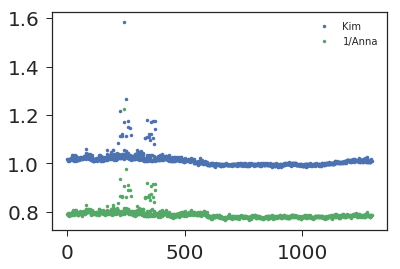

In [39]:
plt.plot(kimConstants2, '.', label='Kim')
plt.plot([1/x for x in subrun117], '.', label = '1/Anna')
plt.legend()
plt.show()

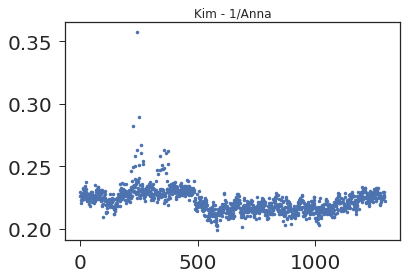

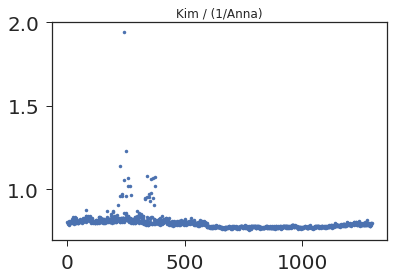

In [111]:
diffVec = [kimConstants2[i] - 1/subrun117[i] for i in range(len(subrun117))]
ratioVec = [kimConstants2[i] / 1/subrun117[i] for i in range(len(subrun117))]

plt.plot(diffVec,'.')
plt.title("Kim - 1/Anna")
plt.show()

plt.plot(ratioVec,'.')
plt.title("Kim / (1/Anna)")
plt.show()

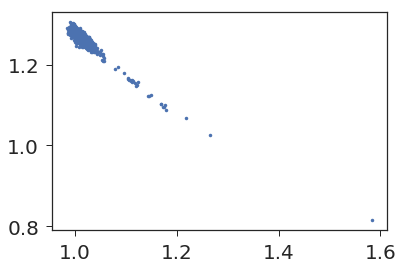

In [42]:
plt.plot(kimConstants2,subrun117,'.')

In [89]:
caloConstants = []

for caloNum in range(1,25):
    print("Starting Calo", caloNum)
    xtalCalib = []
    for runNum in runlist:
        dbstring = ("http://dbdata0vm.fnal.gov:9091/QE/gm2/dev/app/SQ/query?dbname=postgres_dev&"+
             "t=calorimeter_calibration_correction_constants&w=calonum:"+str(caloNum)+"&w=isvalid:t&l=1&w=validfromrun:0")

        opener = urllib.request.urlopen(dbstring)
        content = opener.read()
        content = content.decode("utf-8")
#        print("Content:", content)
#        print("")

        try:
            n = content.index('[') + 1
            n2 = content.index(']') - 1
            caloConstants.append(content[n:n2])
        except:
            print(runNum, "not found", content)

#print(caloConstants)

Starting Calo 1
Starting Calo 2
Starting Calo 3
Starting Calo 4
Starting Calo 5
Starting Calo 6
Starting Calo 7
Starting Calo 8
Starting Calo 9
Starting Calo 10
Starting Calo 11
Starting Calo 12
Starting Calo 13
Starting Calo 14
Starting Calo 15
Starting Calo 16
Starting Calo 17
Starting Calo 18
Starting Calo 19
Starting Calo 20
Starting Calo 21
Starting Calo 22
Starting Calo 23
Starting Calo 24


In [90]:
caloConstants2 = []
for entry in caloConstants:
    ding = entry.split()
    ding = [float(x[:-1]) for x in ding]
#    print(ding)
    for dong in ding:
        caloConstants2.append(dong)

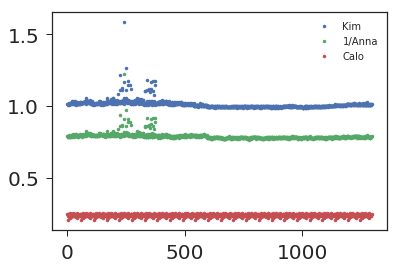

In [91]:
plt.plot(kimConstants2, '.', label='Kim')
plt.plot([1/x for x in subrun117], '.', label = '1/Anna')
plt.plot(caloConstants2,'.', label='Calo')
plt.legend()
plt.show()

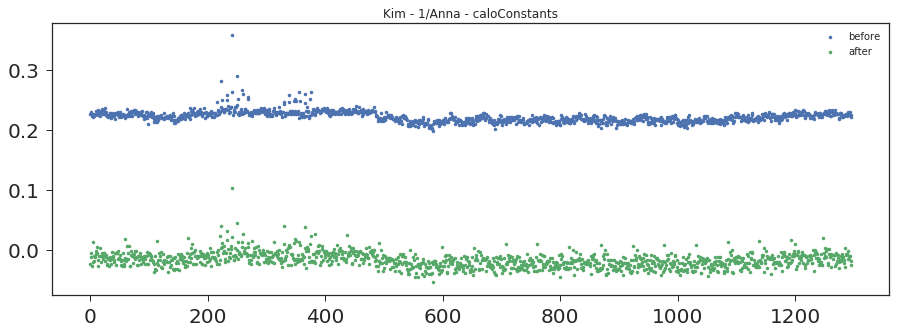

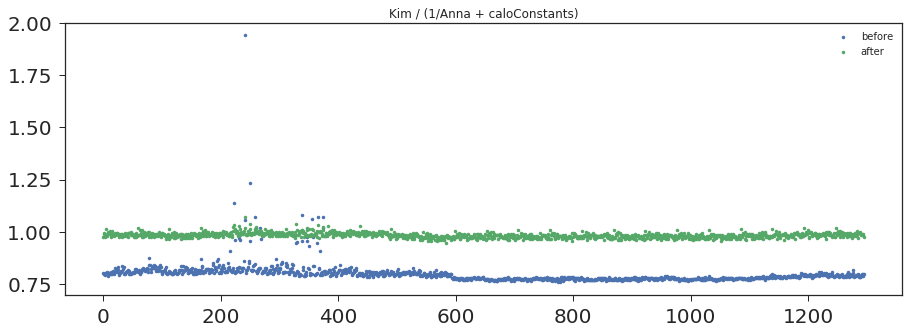

In [92]:

diffVec2 = [kimConstants2[i] - 1/subrun117[i] - caloConstants2[i] for i in range(len(subrun117))]
ratioVec2 = [kimConstants2[i] / (1/subrun117[i] + caloConstants2[i]) for i in range(len(subrun117))]

plt.subplots(figsize=(15,5))
plt.plot(diffVec,'.',label='before')
plt.plot(diffVec2, '.',label='after')
plt.title("Kim - 1/Anna - caloConstants")
plt.legend()
plt.show()


plt.subplots(figsize=(15,5))
plt.plot(ratioVec,'.',label='before')
plt.plot(ratioVec2, '.',label='after')
plt.title("Kim / (1/Anna + caloConstants)")
plt.legend()
plt.show()

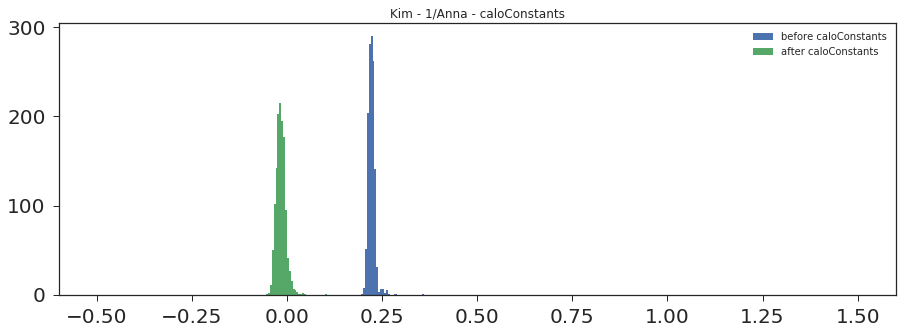

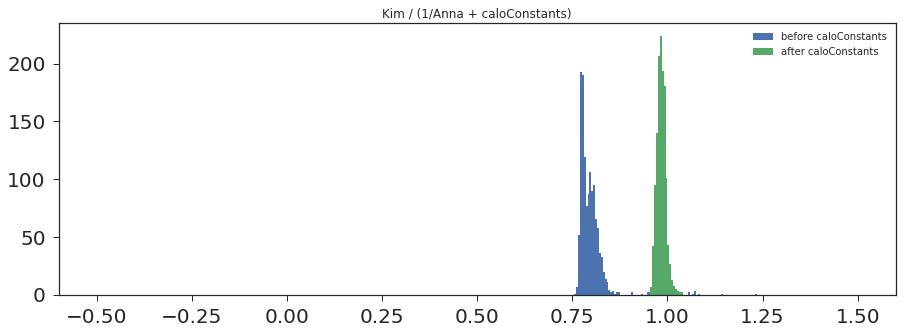

In [96]:
plt.subplots(figsize=(15,5))
plt.hist(diffVec,label='before caloConstants',range=(-0.5,1.5),bins=400)
plt.hist(diffVec2,label='after caloConstants',range=(-0.5,1.5),bins=400)
plt.title("Kim - 1/Anna - caloConstants")
plt.legend()
plt.show()


plt.subplots(figsize=(15,5))
plt.hist(ratioVec,label='before caloConstants',range=(-0.5,1.5),bins=400)
plt.hist(ratioVec2,label='after caloConstants',range=(-0.5,1.5),bins=400)
plt.title("Kim / (1/Anna + caloConstants)")
plt.legend()
plt.show()

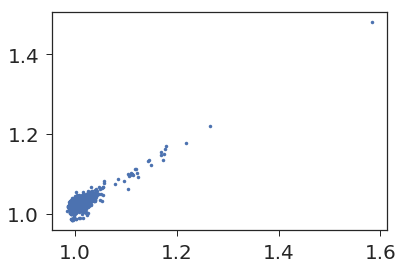

In [94]:
plt.plot(kimConstants2,[1/subrun117[i] + caloConstants2[i] for i in range(len(subrun117))],'.')

In [105]:
mipfile = open("mips.txt","r")
mipCorr = []

for line in mipfile.readlines():
    values = line.split()
    try:
        mipCorr.append( float(values[2]) )
    except:
        continue

mipfile.close()

print(mipCorr)

[0.358, 0.383, 0.395, 0.41, 0.33, 0.362, 0.348, 0.433, 0.394, 0.328, 0.451, 0.359, 0.304, 0.352, 0.323, 0.371, 0.373, 0.388, 0.346, 0.449, 0.434, 0.34, 0.331, 0.425, 0.191, 0.406, 0.376, 0.309, 0.325, 0.381, 0.404, 0.204, 0.365, 0.408, 0.381, 0.463, 0.31, 0.375, 0.336, 0.435, 0.393, 0.45, 0.453, 0.381, 0.365, 0.321, 0.364, 0.726, 0.342, 0.327, 0.446, 0.415, 0.376, 0.403, 0.332, 0.325, 0.288, 0.362, 0.299, 0.367, 0.399, 0.345, 0.39, 0.311, 0.326, 0.369, 0.354, 0.42, 0.496, 0.497, 0.442, 0.367, 0.341, 0.343, 0.343, 0.384, 0.345, 0.431, 0.457, 0.564, 0.508, 0.335, 0.391, 0.391, 0.37, 0.404, 0.415, 0.476, 0.274, 0.501, 0.331, 0.422, 0.289, 0.356, 0.566, 0.556, 0.379, 0.616, 0.442, 0.384, 0.367, 0.338, 0.327, 0.39, 0.365, 0.359, 0.398, 0.392, 0.4, 0.426, 0.333, 0.339, 0.387, 0.406, 0.401, 0.435, 0.402, 0.349, 0.398, 0.342, 0.437, 0.242, 0.353, 0.475, 0.376, 0.407, 0.423, 0.401, 0.551, 0.446, 0.366, 0.447, 0.354, 0.507, 0.541, 0.361, 0.432, 0.376, 0.452, 0.44, 0.315, 0.343, 0.409, 0.412, 0.3

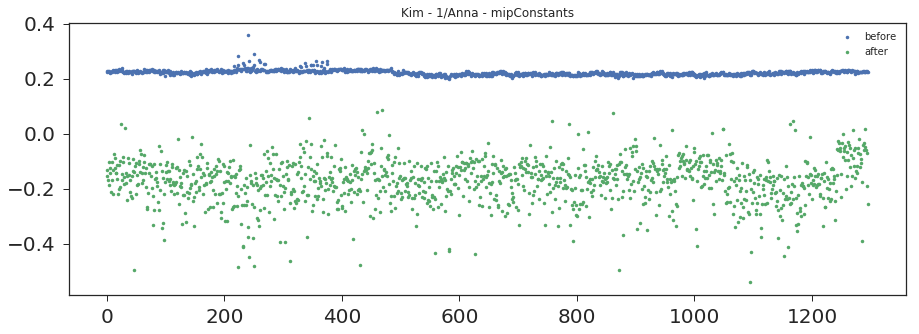

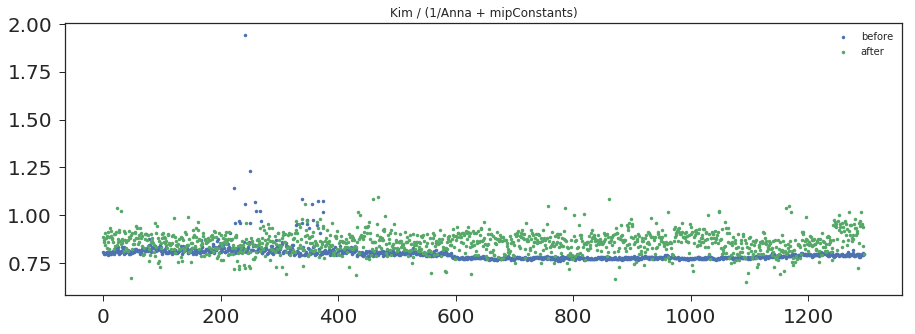

In [106]:
diffVec3 = [kimConstants2[i] - 1/subrun117[i] - mipCorr[i] for i in range(len(subrun117))]
ratioVec3 = [kimConstants2[i] / (1/subrun117[i] + mipCorr[i]) for i in range(len(subrun117))]

plt.subplots(figsize=(15,5))
plt.plot(diffVec,'.',label='before')
plt.plot(diffVec3, '.',label='after')
plt.title("Kim - 1/Anna - mipConstants")
plt.legend()
plt.show()


plt.subplots(figsize=(15,5))
plt.plot(ratioVec,'.',label='before')
plt.plot(ratioVec3, '.',label='after')
plt.title("Kim / (1/Anna + mipConstants)")
plt.legend()
plt.show()

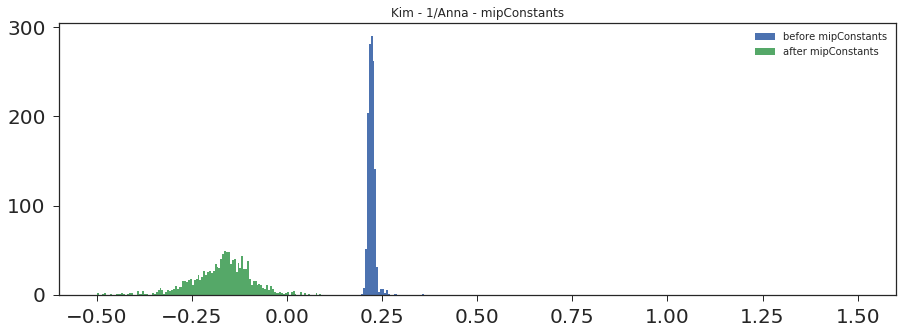

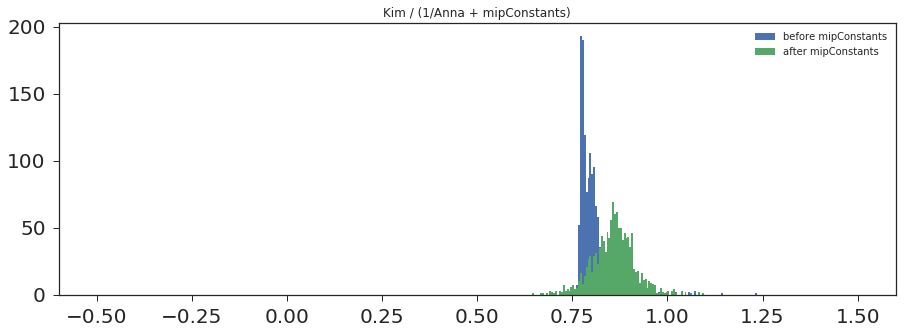

In [107]:
plt.subplots(figsize=(15,5))
plt.hist(diffVec,label='before mipConstants',range=(-0.5,1.5),bins=400)
plt.hist(diffVec3,label='after mipConstants',range=(-0.5,1.5),bins=400)
plt.title("Kim - 1/Anna - mipConstants")
plt.legend()
plt.show()


plt.subplots(figsize=(15,5))
plt.hist(ratioVec,label='before mipConstants',range=(-0.5,1.5),bins=400)
plt.hist(ratioVec3,label='after mipConstants',range=(-0.5,1.5),bins=400)
plt.title("Kim / (1/Anna + mipConstants)")
plt.legend()
plt.show()

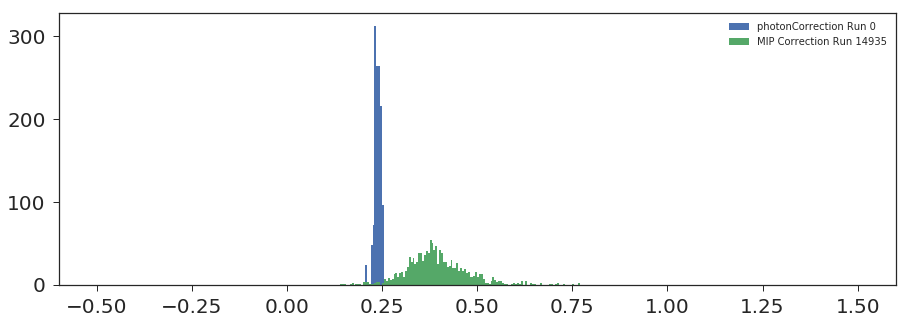

In [110]:
plt.subplots(figsize=(15,5))
plt.hist(caloConstants2,label='photonCorrection Run 0',range=(-0.5,1.5),bins=400)
plt.hist(mipCorr, label = 'MIP Correction Run 14935',range=(-0.5,1.5),bins=400)
plt.legend()
plt.show()